In [4]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

# %matplotlib inline
# %precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set an arbitrary global seed to keep the randomly generated quantities the same
seed = 1
np.random.seed(seed)

import elfi
from elfi.examples import ma2
from elfi.methods.parameter_inference import ROMC
model = ma2.get_model(seed_obs=seed)

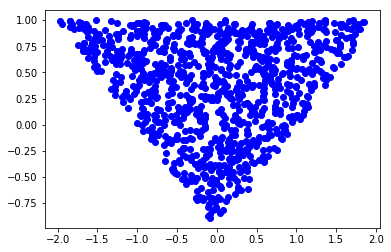

In [5]:
x = model.generate(1000)

plt.plot(x["t1"], x["t2"], "bo")
plt.show()

In [6]:
bounds = [(-2, 2), (-1.25, 1.25)]
romc = ROMC(model, discrepancy_name="d", bounds=bounds)

In [9]:
n1 = 100
seed = 21
use_bo = True
romc.solve_problems(n1=n1, use_bo=use_bo, seed=seed)

### Solving problems using Bayesian optimisation ###
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 486.241 sec
Time: 486.241 sec


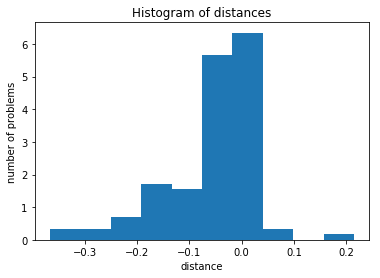

In [10]:
romc.distance_hist()

In [11]:
eps = .01
romc.estimate_regions(eps=eps)

Total solutions: 100, Accepted solutions after filtering: 99
### Estimating regions ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 1.612 sec 



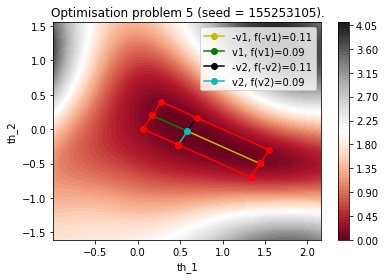

In [12]:
romc.visualize_region(5)

In [8]:
romc.eval_unnorm_posterior(np.array([[0., 0.]]))

array([0.75])

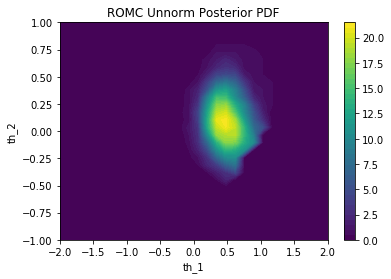

In [13]:
def plot_romc_posterior(posterior, nof_points):
    plt.figure()
    th1 = np.linspace(-2, 2, nof_points)
    th2 = np.linspace(-1, 1, nof_points)
    X, Y = np.meshgrid(th1, th2)

    x_flat = X.flatten()
    y_flat = Y.flatten()
    th = np.stack((x_flat, y_flat), -1)
    z_flat = posterior(th)
    Z = z_flat.reshape(nof_points, nof_points)
    
    plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.title('ROMC Unnorm Posterior PDF')
    plt.xlabel("th_1")
    plt.ylabel("th_2")
    plt.colorbar()
    plt.show(block=False)
    
plot_romc_posterior(romc.eval_unnorm_posterior, nof_points=30)

In [14]:
n2 = 40
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 7.061 sec 



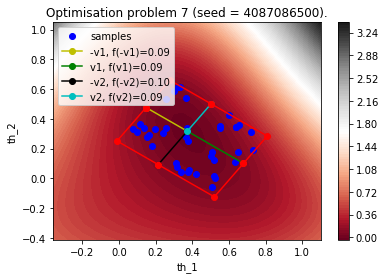

In [15]:
# As before but now it plots the samples as well
romc.visualize_region(7)

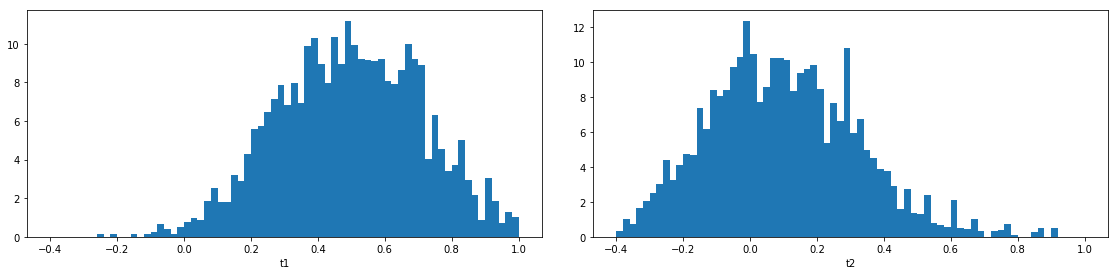

In [16]:
romc.result.plot_marginals(weights=romc.result.weights, bins=70, range=(-.4, 1))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2521342438>,
      dtype=object)

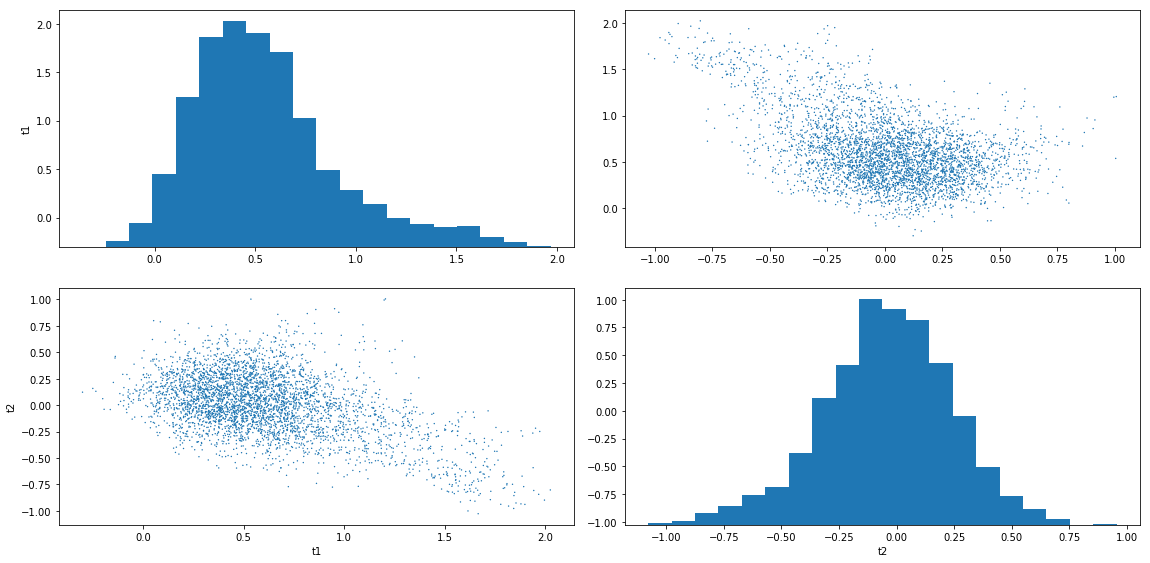

In [17]:
romc.result.plot_pairs()

In [18]:
romc.result.summary()

Method: ROMC
Number of samples: 3960
Sample means: t1: 0.501, t2: 0.099
